In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [60]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.029) 

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 600, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.95%
# Neural layers: 64, 32, 1
# Learning rate: 0.03
# Epochs: 1500
# Batch size; 200


Epoch 1/600
244/244 - 0s - loss: 267415896064.0000 - mean_absolute_percentage_error: 34.5982
Epoch 2/600
244/244 - 0s - loss: 187592458240.0000 - mean_absolute_percentage_error: 29.2731
Epoch 3/600
244/244 - 1s - loss: 185473794048.0000 - mean_absolute_percentage_error: 29.0515
Epoch 4/600
244/244 - 0s - loss: 184751702016.0000 - mean_absolute_percentage_error: 28.9774
Epoch 5/600
244/244 - 0s - loss: 184240635904.0000 - mean_absolute_percentage_error: 28.9216
Epoch 6/600
244/244 - 0s - loss: 183787208704.0000 - mean_absolute_percentage_error: 28.8689
Epoch 7/600
244/244 - 1s - loss: 183344234496.0000 - mean_absolute_percentage_error: 28.8146
Epoch 8/600
244/244 - 0s - loss: 182883319808.0000 - mean_absolute_percentage_error: 28.7579
Epoch 9/600
244/244 - 1s - loss: 182427811840.0000 - mean_absolute_percentage_error: 28.7028
Epoch 10/600
244/244 - 0s - loss: 181987426304.0000 - mean_absolute_percentage_error: 28.6498
Epoch 11/600
244/244 - 0s - loss: 181043396608.0000 - mean_absolute_p

Epoch 89/600
244/244 - 0s - loss: 154326614016.0000 - mean_absolute_percentage_error: 27.6377
Epoch 90/600
244/244 - 0s - loss: 153254133760.0000 - mean_absolute_percentage_error: 27.4975
Epoch 91/600
244/244 - 0s - loss: 153726468096.0000 - mean_absolute_percentage_error: 27.5282
Epoch 92/600
244/244 - 0s - loss: 152891342848.0000 - mean_absolute_percentage_error: 27.4564
Epoch 93/600
244/244 - 0s - loss: 152848302080.0000 - mean_absolute_percentage_error: 27.3431
Epoch 94/600
244/244 - 0s - loss: 153970163712.0000 - mean_absolute_percentage_error: 27.3743
Epoch 95/600
244/244 - 0s - loss: 153387335680.0000 - mean_absolute_percentage_error: 27.3099
Epoch 96/600
244/244 - 0s - loss: 153371443200.0000 - mean_absolute_percentage_error: 27.3047
Epoch 97/600
244/244 - 0s - loss: 153382895616.0000 - mean_absolute_percentage_error: 27.4188
Epoch 98/600
244/244 - 1s - loss: 153053773824.0000 - mean_absolute_percentage_error: 27.3680
Epoch 99/600
244/244 - 0s - loss: 152352309248.0000 - mean_a

Epoch 176/600
244/244 - 0s - loss: 140919357440.0000 - mean_absolute_percentage_error: 24.6235
Epoch 177/600
244/244 - 0s - loss: 141430636544.0000 - mean_absolute_percentage_error: 24.6869
Epoch 178/600
244/244 - 0s - loss: 141310754816.0000 - mean_absolute_percentage_error: 24.5140
Epoch 179/600
244/244 - 0s - loss: 140669878272.0000 - mean_absolute_percentage_error: 24.2822
Epoch 180/600
244/244 - 0s - loss: 140538675200.0000 - mean_absolute_percentage_error: 24.4525
Epoch 181/600
244/244 - 0s - loss: 140864241664.0000 - mean_absolute_percentage_error: 24.4448
Epoch 182/600
244/244 - 0s - loss: 141050937344.0000 - mean_absolute_percentage_error: 24.4583
Epoch 183/600
244/244 - 0s - loss: 140474302464.0000 - mean_absolute_percentage_error: 24.3882
Epoch 184/600
244/244 - 0s - loss: 140161368064.0000 - mean_absolute_percentage_error: 24.4919
Epoch 185/600
244/244 - 0s - loss: 139066032128.0000 - mean_absolute_percentage_error: 24.1281
Epoch 186/600
244/244 - 1s - loss: 139901550592.00

Epoch 263/600
244/244 - 0s - loss: 135620894720.0000 - mean_absolute_percentage_error: 23.1919
Epoch 264/600
244/244 - 0s - loss: 137415344128.0000 - mean_absolute_percentage_error: 23.4534
Epoch 265/600
244/244 - 0s - loss: 137758507008.0000 - mean_absolute_percentage_error: 23.4549
Epoch 266/600
244/244 - 0s - loss: 137458647040.0000 - mean_absolute_percentage_error: 23.4257
Epoch 267/600
244/244 - 0s - loss: 137780117504.0000 - mean_absolute_percentage_error: 23.4922
Epoch 268/600
244/244 - 0s - loss: 137519644672.0000 - mean_absolute_percentage_error: 23.5292
Epoch 269/600
244/244 - 1s - loss: 137105154048.0000 - mean_absolute_percentage_error: 23.5169
Epoch 270/600
244/244 - 1s - loss: 136855142400.0000 - mean_absolute_percentage_error: 23.4849
Epoch 271/600
244/244 - 0s - loss: 136445804544.0000 - mean_absolute_percentage_error: 23.4439
Epoch 272/600
244/244 - 0s - loss: 135336714240.0000 - mean_absolute_percentage_error: 23.2078
Epoch 273/600
244/244 - 0s - loss: 137050177536.00

Epoch 350/600
244/244 - 0s - loss: 133032886272.0000 - mean_absolute_percentage_error: 22.6494
Epoch 351/600
244/244 - 0s - loss: 135522238464.0000 - mean_absolute_percentage_error: 23.4162
Epoch 352/600
244/244 - 0s - loss: 132493107200.0000 - mean_absolute_percentage_error: 22.9932
Epoch 353/600
244/244 - 0s - loss: 135341744128.0000 - mean_absolute_percentage_error: 23.3630
Epoch 354/600
244/244 - 0s - loss: 133708333056.0000 - mean_absolute_percentage_error: 23.3372
Epoch 355/600
244/244 - 0s - loss: 131700752384.0000 - mean_absolute_percentage_error: 22.9476
Epoch 356/600
244/244 - 0s - loss: 132388003840.0000 - mean_absolute_percentage_error: 22.9628
Epoch 357/600
244/244 - 0s - loss: 132927922176.0000 - mean_absolute_percentage_error: 23.0957
Epoch 358/600
244/244 - 0s - loss: 135055900672.0000 - mean_absolute_percentage_error: 23.4086
Epoch 359/600
244/244 - 0s - loss: 134500425728.0000 - mean_absolute_percentage_error: 23.2900
Epoch 360/600
244/244 - 0s - loss: 133940797440.00

Epoch 437/600
244/244 - 0s - loss: 129903026176.0000 - mean_absolute_percentage_error: 22.1422
Epoch 438/600
244/244 - 0s - loss: 131542745088.0000 - mean_absolute_percentage_error: 22.9400
Epoch 439/600
244/244 - 0s - loss: 129969070080.0000 - mean_absolute_percentage_error: 22.1924
Epoch 440/600
244/244 - 0s - loss: 131202162688.0000 - mean_absolute_percentage_error: 22.5355
Epoch 441/600
244/244 - 0s - loss: 131143966720.0000 - mean_absolute_percentage_error: 22.8162
Epoch 442/600
244/244 - 0s - loss: 133017444352.0000 - mean_absolute_percentage_error: 22.8659
Epoch 443/600
244/244 - 0s - loss: 131168829440.0000 - mean_absolute_percentage_error: 22.4515
Epoch 444/600
244/244 - 0s - loss: 131599466496.0000 - mean_absolute_percentage_error: 22.4386
Epoch 445/600
244/244 - 0s - loss: 131589718016.0000 - mean_absolute_percentage_error: 22.7489
Epoch 446/600
244/244 - 0s - loss: 131227017216.0000 - mean_absolute_percentage_error: 22.4754
Epoch 447/600
244/244 - 0s - loss: 132115931136.00

Epoch 524/600
244/244 - 1s - loss: 129191976960.0000 - mean_absolute_percentage_error: 22.1701
Epoch 525/600
244/244 - 0s - loss: 129660436480.0000 - mean_absolute_percentage_error: 22.2668
Epoch 526/600
244/244 - 1s - loss: 129835786240.0000 - mean_absolute_percentage_error: 22.5548
Epoch 527/600
244/244 - 0s - loss: 129492885504.0000 - mean_absolute_percentage_error: 22.2080
Epoch 528/600
244/244 - 1s - loss: 128165773312.0000 - mean_absolute_percentage_error: 22.1029
Epoch 529/600
244/244 - 0s - loss: 129440899072.0000 - mean_absolute_percentage_error: 22.2505
Epoch 530/600
244/244 - 0s - loss: 128523542528.0000 - mean_absolute_percentage_error: 21.9751
Epoch 531/600
244/244 - 1s - loss: 128596566016.0000 - mean_absolute_percentage_error: 22.0507
Epoch 532/600
244/244 - 1s - loss: 130198036480.0000 - mean_absolute_percentage_error: 22.4487
Epoch 533/600
244/244 - 0s - loss: 128862134272.0000 - mean_absolute_percentage_error: 21.9891
Epoch 534/600
244/244 - 1s - loss: 131339026432.00

dict_keys(['loss', 'mean_absolute_percentage_error'])


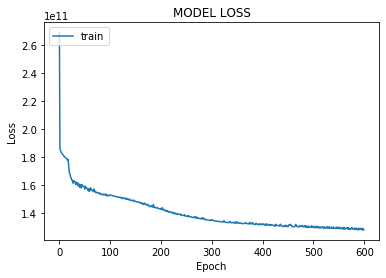

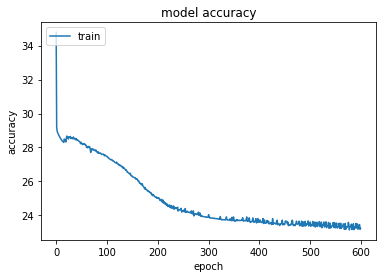

In [57]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()